In [1]:
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import cufflinks as cf
cf.set_config_file(offline=True)

In [2]:
# The Open and Close Prices for the Bank of America Corporation (BAC).
df1 = pdr.get_data_yahoo('BAC', '2011-01-01', '2021-10-31')
df1 = df1[['Open', 'Close']]
df1 = df1.rename(columns = {'Open': 'Open_BAC', 'Close': 'Close_BAC'})

# The Open and Close Prices for the Visa Inc.(V).
df2 = pdr.get_data_yahoo('V', '2011-01-01', '2021-10-31')
df2 = df2[['Open', 'Close']]
df2 = df2.rename(columns = {'Open': 'Open_V', 'Close': 'Close_V'})

# The Open and Close Prices for the Microsoft Corporation (MSFT).
df3 = pdr.get_data_yahoo('MSFT', '2011-01-01', '2021-10-31')
df3 = df3[['Open', 'Close']]
df3 = df3.rename(columns = {'Open': 'Open_MSFT', 'Close': 'Close_MSFT'})

# The Open and Close Prices for the JPMorgan Chase & Co (JPM).
df4 = pdr.get_data_yahoo('JPM', '2011-01-01', '2021-10-31')
df4 = df4[['Open', 'Close']]
df4 = df4.rename(columns = {'Open': 'Open_JPM', 'Close': 'Close_JPM'})

# The Open and Close Prices for the Mastercard Incorporated (MA).
df5 = pdr.get_data_yahoo('MA', '2011-01-01', '2021-10-31')
df5 = df5[['Open', 'Close']]
df5 = df5.rename(columns = {'Open': 'Open_MA', 'Close': 'Close_MA'})

# Join the individual tables into a single data table indexed by date. 
df = df1.merge(df2, on = 'Date')
df = df.merge(df3, on = 'Date')
df = df.merge(df4, on = 'Date')
df = df.merge(df5, on = 'Date')
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open_BAC,Close_BAC,Open_V,Close_V,Open_MSFT,Close_MSFT,Open_JPM,Close_JPM,Open_MA,Close_MA
Date,,,,,,,,,,
2010-12-31,13.230000,13.340000,17.570000,17.594999,27.799999,27.910000,42.110001,42.419998,22.353001,22.410999
2011-01-03,13.850000,14.190000,17.600000,17.629999,28.049999,27.980000,43.000000,43.580002,22.643999,22.084999
2011-01-04,14.230000,14.240000,17.732500,17.650000,27.940001,28.090000,43.779999,44.160000,22.122999,22.370001
2011-01-05,14.190000,14.500000,17.709999,18.022499,27.900000,28.000000,43.919998,44.700001,22.370001,23.028999
2011-01-06,14.540000,14.440000,18.182501,18.292500,28.040001,28.820000,44.400002,44.480000,23.159000,23.112000
...,...,...,...,...,...,...,...,...,...,...
2021-10-25,47.799999,47.509998,233.449997,233.880005,309.359985,308.130005,172.710007,170.940002,362.459991,360.859985
2021-10-26,47.660000,47.959999,235.529999,231.820007,311.000000,310.109985,171.000000,171.399994,363.380005,357.320007
2021-10-27,47.480000,47.040001,224.750000,215.779999,316.000000,323.170013,170.320007,167.830002,348.000000,335.720001


In [3]:
# Slice off the first three years of daily price data.
three_years = df.loc['2011-01-01': '2013-12-31']
three_years = three_years[['Close_BAC', 'Close_V', 'Close_MSFT', 'Close_JPM', 'Close_MA']]

# Retain the Close Prices and convert them into daily return values.
three_years['Return_BAC'] = three_years['Close_BAC'].pct_change()
three_years['Return_V'] = three_years['Close_V'].pct_change()
three_years['Return_MSFT'] = three_years['Close_MSFT'].pct_change()
three_years['Return_JPM'] = three_years['Close_JPM'].pct_change()
three_years['Return_MA'] = three_years['Close_MA'].pct_change()
three_years = three_years[['Return_BAC', 'Return_V', 'Return_MSFT', 'Return_JPM', 'Return_MA']]

three_years = three_years.dropna()
three_years

,Return_BAC,Return_V,Return_MSFT,Return_JPM,Return_MA
Date,,,,,
2011-01-04,0.003524,0.001134,0.003931,0.013309,0.012905
2011-01-05,0.018258,0.021105,-0.003204,0.012228,0.029459
2011-01-06,-0.004138,0.014981,0.029286,-0.004922,0.003604
2011-01-07,-0.013158,-0.002870,-0.007634,-0.018885,-0.000130
2011-01-10,0.010526,-0.015762,-0.013287,-0.005499,-0.003851
...,...,...,...,...,...
2013-12-24,0.000637,0.003211,0.012562,0.000172,-0.002331
2013-12-26,-0.003185,0.006721,0.009709,-0.000858,0.010699
2013-12-27,0.001278,-0.002407,-0.004006,-0.001031,0.007264


In [4]:
# simulate at least ten thousand (10,000) different portfolio allocations as each of the ten thousand (10,000) different vectors corresponds to a unique portfolio allocation possibility.
matrix_of_return_value = np.asmatrix(three_years)
matrix_of_return_value = matrix_of_return_value.T

no_of_asset_classes = 5
no_of_portfolios = 10000

np.random.seed(123)
matrix_of_return_values = np.random.randn(no_of_asset_classes, no_of_portfolios)
# Initialize empty lists.
collection_of_random_asset_weights = []
portfolio_means = []
portfolio_standard_deviations = []
portfolio_sharpe_ratios = []

def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    random_asset_weights /= sum(random_asset_weights)
    random_asset_weights = np.asmatrix(random_asset_weights)
    return random_asset_weights

# Calculate the portfolio statistics.
def get_portfolio_statistics(asset_weights, matrix_of_return_value):
    asset_means = np.asmatrix(np.mean(matrix_of_return_value, axis = 1))
    asset_covariances = np.asmatrix(np.cov(matrix_of_return_value))
    portfolio_mean= asset_weights * asset_means
    portfolio_mean= portfolio_mean.item()
    portfolio_standard_deviation= np.sqrt(asset_weights * asset_covariances * asset_weights.T)
    portfolio_standard_deviation= portfolio_standard_deviation.item()
    portfolio_sharpe_ratio= portfolio_mean / portfolio_standard_deviation
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio

while len(collection_of_random_asset_weights) < no_of_portfolios:
    random_asset_weights = get_random_asset_weights(no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights)
    portfolio_means.append(get_portfolio_statistics(random_asset_weights, matrix_of_return_value)[0])
    portfolio_standard_deviations.append(get_portfolio_statistics(random_asset_weights, matrix_of_return_value)[1])
    portfolio_sharpe_ratios.append(get_portfolio_statistics(random_asset_weights, matrix_of_return_value)[2])
    
    
index = portfolio_sharpe_ratios.index(max(portfolio_sharpe_ratios))
print(collection_of_random_asset_weights[index])
#Report the maximum value of Sharpe ratio achieved by any of your portfolio allocation possibilities.
print(portfolio_sharpe_ratios[index])

[[0.01082786 0.48784479 0.06957349 0.00680989 0.42494396]]
0.11201434707724482


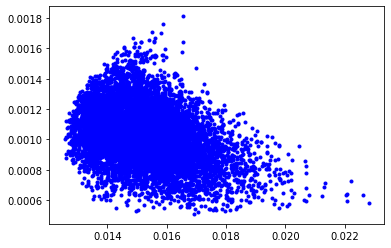

In [5]:
# Make a scatterplot showing the corresponding values (x, y) of the overall portfolio standard deviation and overall portfolio mean.
plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'blue') 
plt.show()

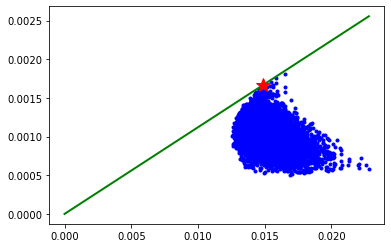

In [6]:
x = np.linspace(0, max(portfolio_standard_deviations), 10000)
y = portfolio_sharpe_ratios[index] * x
plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'blue')
plt.plot(x, y, '-', linewidth = 2, color = 'green')
plt.plot(portfolio_standard_deviations[index],portfolio_means[index],color="red",marker="*",markersize = 15)
plt.show()

In [7]:
#  Give a complete conceptual description of the meaning of the Sharpe ratio as it relates to the theory of portfolio optimization. Why do portfolio managers seek to maximize this measure?
# **The Sharpe Ratio helps evaluate the returns of an investment compared to the risks. It assists investors in evaluating the performance of their portfolios and taking into account the risks that the investor may bear in excess of the risk-free rate. Portfolio managers seek to maximize this percentage, because if it increases, it indicates that the investment risk is lower.**

In [8]:
#Determine which vector of asset weights (percentages) results in the portfolio allocation possibility of highest Sharpe ratio.
some_weights = pd.DataFrame({"BAC": [0.01082786], "V": [0.48784479], "MSFT": [0.06957349], "JPM": [0.00680989], "MA": [0.42494396]}, index = [three_years.last_valid_index()])
some_weights

,BAC,V,MSFT,JPM,MA
2013-12-31,0.010828,0.487845,0.069573,0.00681,0.424944


In [9]:
capital = 10000
allocation = capital*some_weights
allocation

,BAC,V,MSFT,JPM,MA
2013-12-31,108.2786,4878.4479,695.7349,68.0989,4249.4396


In [10]:
print(df['Close_BAC'].loc[some_weights.last_valid_index()])
print(df['Close_V'].loc[some_weights.last_valid_index()])
print(df['Close_MSFT'].loc[some_weights.last_valid_index()])
print(df['Close_JPM'].loc[some_weights.last_valid_index()])
print(df['Close_MA'].loc[some_weights.last_valid_index()])

no_of_shares = allocation 
no_of_shares['BAC'].iloc[0] /= df['Close_BAC'].loc[some_weights.last_valid_index()]
no_of_shares['V'].iloc[0] /= df['Close_V'].loc[some_weights.last_valid_index()]
no_of_shares['MSFT'].iloc[0] /= df['Close_MSFT'].loc[some_weights.last_valid_index()]
no_of_shares['JPM'].iloc[0] /= df['Close_JPM'].loc[some_weights.last_valid_index()]
no_of_shares['MA'].iloc[0] /= df['Close_MA'].loc[some_weights.last_valid_index()]
no_of_shares

15.569999694824219
55.66999816894531
37.40999984741211
58.47999954223633
83.5459976196289


,BAC,V,MSFT,JPM,MA
2013-12-31,6.95431,87.631544,18.597565,1.164482,50.863473


In [11]:
# Part1: Turn my optimized portfolio into an investable fund.
seven_years = df.loc['2013-12-31':] 
seven_years['SFA_fund_Open'] = seven_years['Open_BAC']*no_of_shares['BAC'].iloc[0] + seven_years['Open_V']*no_of_shares['V'].iloc[0] + seven_years['Open_MSFT']*no_of_shares['MSFT'].iloc[0]+ seven_years['Open_JPM']*no_of_shares['JPM'].iloc[0]+ seven_years['Open_MA']*no_of_shares['MA'].iloc[0]
seven_years['SFA_fund_Close'] = seven_years['Close_BAC']*no_of_shares['BAC'].iloc[0] + seven_years['Close_V']*no_of_shares['V'].iloc[0]+ seven_years['Close_MSFT']*no_of_shares['MSFT'].iloc[0]+ seven_years['Close_JPM']*no_of_shares['JPM'].iloc[0]+ seven_years['Close_MA']*no_of_shares['MA'].iloc[0]
seven_years = seven_years[['SFA_fund_Open','SFA_fund_Close']]
seven_years

,SFA_fund_Open,SFA_fund_Close
Date,,
2013-12-31,9994.171201,9999.999900
2014-01-02,9984.463962,9955.421975
2014-01-03,9973.653244,9939.801271
2014-01-06,9947.084684,9877.336285
2014-01-07,9924.286686,9970.342190
...,...,...
2021-10-25,45180.433796,45109.781652
2021-10-26,45437.038054,44789.693220
2021-10-27,43801.033859,42517.760751


[*********************100%***********************]  1 of 1 completed
Absolute Return of Our Portfolio:323.21%
CAGR of Our Portfolio: 14.24%
Information Ratio of Our Portfolio:1.95



<AxesSubplot:xlabel='Date'>

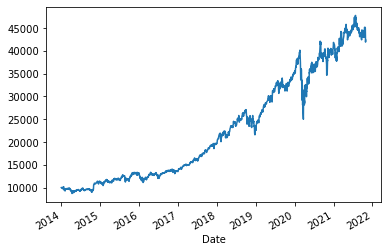

In [12]:
# Print the Absolute Return, Compound Annual Growth Rate, and Information Ratio for your fund.
absolute_return_SFA = (seven_years['SFA_fund_Close'].iloc[-1]-capital)/capital
CAGR_SFA = ((seven_years['SFA_fund_Close'].iloc[-1]/capital)**(365/(df.index[-1] - df.index[0]).days))-1

# I choosed S&P500. To be the benchmark.
df_SP500 = pdr.get_data_yahoo('^GSPC', '2014-01-01', '2021-10-30')
df_SP500 = df_SP500[['Open', 'Close']]
df_SP500 = df_SP500.rename(columns = {'Open': 'Open_SP500', 'Close': 'Close_SP500'})

information_ratio_SFA = (seven_years.SFA_fund_Close.pct_change().dropna().mean() - df_SP500.Close_SP500.pct_change().dropna().mean())/(seven_years.SFA_fund_Close.pct_change().dropna().std()*df_SP500.Close_SP500.pct_change().dropna().std())

SFA=f"""Absolute Return of Our Portfolio:{absolute_return_SFA*100:.2f}%
CAGR of Our Portfolio: {CAGR_SFA*100:.2f}%
Information Ratio of Our Portfolio:{information_ratio_SFA:.2f}
"""
print(SFA)
seven_years.SFA_fund_Close.plot()

In [13]:
# generate some mildly predictive features.
short_time = 5
long_time = 15
seven_years['Close_short_Rolling'] = seven_years['SFA_fund_Close'].rolling(window = short_time).mean()
seven_years['Close_long_Rolling'] = seven_years['SFA_fund_Close'].rolling(window = long_time).mean()
seven_years['Window_diff'] = seven_years['Close_long_Rolling'] - seven_years['Close_short_Rolling']
seven_years['Open_1_change'] = seven_years['SFA_fund_Open']-seven_years['SFA_fund_Open'].shift(1)
seven_years = seven_years.dropna()
seven_years

,SFA_fund_Open,SFA_fund_Close,Close_short_Rolling,Close_long_Rolling,Window_diff,Open_1_change
Date,,,,,,
2014-01-22,10133.930165,10195.785381,10060.722277,9974.560764,-86.161513,-58.411583
2014-01-23,10193.916611,10043.226834,10076.919238,9977.442560,-99.476678,59.986446
2014-01-24,9997.178177,9703.537259,10031.461012,9960.650245,-70.810766,-196.738434
2014-01-27,9744.429372,9452.736761,9899.632042,9928.179278,28.547236,-252.748805
2014-01-28,9519.465354,9706.121826,9820.281612,9916.764981,96.483368,-224.964018
...,...,...,...,...,...,...
2021-10-25,45180.433796,45109.781652,44859.257170,44082.080061,-777.177109,560.318981
2021-10-26,45437.038054,44789.693220,44790.547188,44202.392350,-588.154838,256.604258
2021-10-27,43801.033859,42517.760751,44360.149634,44134.201967,-225.947667,-1636.004195


In [14]:
# Train-test-split your data using 30% of the data for the train, the remainder for the test.
# Create an SK-Learn Logistic Regressor and train it with the train data and labels (X and y).
# Display your logistic regression coefficients for the grader to evaluate as the output of a cell. 

X = seven_years.copy()
y = np.where(X.SFA_fund_Close.shift(-1) >= X.SFA_fund_Close, 1, -1)
index = int(0.3*len(X))
X_train = X.iloc[:index]
X_test = X.iloc[index:]
y_train = y[:index]
y_test = y[index:]
logistic = LogisticRegression()
logistic = logistic.fit(X_train,y_train)
pd.DataFrame(zip(X.columns, np.transpose(logistic.coef_)))

,0,1
0,SFA_fund_Open,[0.000806766435327186]
1,SFA_fund_Close,[-0.0014199229774857537]
2,Close_short_Rolling,[0.0003415068961277085]
3,Close_long_Rolling,[0.00028961449738364463]
4,Window_diff,[-5.189239874396694e-05]
5,Open_1_change,[-0.00014606388641681036]


In [15]:
# Generate your predictions using your X_test data, and run a classification report or confusion matrix.
predictions = logistic.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))
print(logistic.score(X_test,y_test))

[[ 95 488]
 [ 92 697]]
0.577259475218659


In [16]:
# Create a results DataFrame.
results = X_test.copy()
results['C2C_Price']= X_test.SFA_fund_Close.shift(-1) - X_test.SFA_fund_Close
results['Predictions'] = predictions
results['True_Label']= y_test
results['Return']= results['C2C_Price']*results['Predictions']
results['Cum_Return']= results['Return'].cumsum()
results = results.dropna()
results

,SFA_fund_Open,SFA_fund_Close,Close_short_Rolling,Close_long_Rolling,Window_diff,Open_1_change,C2C_Price,Predictions,True_Label,Return,Cum_Return
Date,,,,,,,,,,,
2016-05-20,12733.079917,12778.619244,12751.093515,12804.736904,53.643389,43.560504,-71.525660,1,-1,-71.525660,-71.525660
2016-05-23,12788.238273,12707.093585,12724.343287,12787.428963,63.085676,55.158356,293.099505,1,1,293.099505,221.573845
2016-05-24,12783.340005,13000.193089,12784.308084,12802.871065,18.562981,-4.898268,-16.901391,-1,-1,16.901391,238.475236
2016-05-25,13033.614022,12983.291699,12826.754663,12818.637549,-8.117115,250.274017,-15.196081,1,-1,-15.196081,223.279155
2016-05-26,13014.606656,12968.095617,12887.458647,12831.876110,-55.582537,-19.007366,108.242605,1,1,108.242605,331.521759
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-22,44620.114815,44786.718577,44772.171701,43938.868681,-833.303020,128.320840,323.063074,1,1,323.063074,52617.020842
2021-10-25,45180.433796,45109.781652,44859.257170,44082.080061,-777.177109,560.318981,-320.088432,1,-1,-320.088432,52296.932409
2021-10-26,45437.038054,44789.693220,44790.547188,44202.392350,-588.154838,256.604258,-2271.932469,1,-1,-2271.932469,50024.999941


In [17]:
# Calculate the absolute return, CAGR and IR for your optimized portfolio.
# Calculate the absolute return, CAGR and IR for your candidate algorithmic trading strategy returns above.
absolute_return_tf = (results['SFA_fund_Close'].iloc[-1]-capital)/capital
CAGR_tf = ((results['SFA_fund_Close'].iloc[-1]/capital)**(365/(df.index[-1] - df.index[0]).days))-1
information_ratio_tf = (results.SFA_fund_Close.pct_change().mean() - df_SP500.Close_SP500.pct_change().dropna().mean())/(results.SFA_fund_Close.pct_change().std()*df_SP500.Close_SP500.pct_change().dropna().std())


absolute_return_bh = (results.SFA_fund_Close.iloc[-1]-results.SFA_fund_Open.iloc[0])/results.SFA_fund_Open.iloc[0]
CAGR_bh = ((results.SFA_fund_Close.iloc[-1]/results.SFA_fund_Open.iloc[0])**(365/(df.index[-1] - df.index[0]).days))-1
information_ratio_bh = (results.SFA_fund_Close.pct_change().mean() - df_SP500.Close_SP500.pct_change().dropna().mean())/(results.SFA_fund_Close.pct_change().std()*df_SP500.Close_SP500.pct_change().dropna().std())

SFA=f"""Absolute Return of Our Algorithmic Trading:{absolute_return_tf*100:.2f}%
Absolute Return of Our buy-and-hold Trading :{absolute_return_bh*100:.2f}%
CAGR of Our Algorithmic Trading: {CAGR_tf*100:.2f}%
CAGR of Our buy-and-hold Trading: {CAGR_bh*100:.2f}%
Information Ratio of Our Algorithmic Trading:{information_ratio_tf:.2f}
Information Ratio of Our buy-and-hold Trading:{information_ratio_bh:.2f}
"""

print(SFA)

# Plot the Equity Curve for the above trading strategy using an appropriate starting value.
results.SFA_fund_Close.iplot()

((results.SFA_fund_Close.pct_change().dropna()+1).cumprod()*capital).iplot()

Absolute Return of Our Algorithmic Trading:318.90%
Absolute Return of Our buy-and-hold Trading :228.99%
CAGR of Our Algorithmic Trading: 14.13%
CAGR of Our buy-and-hold Trading: 11.62%
Information Ratio of Our Algorithmic Trading:2.68
Information Ratio of Our buy-and-hold Trading:2.68

